In [9]:
import pandas as pd
import torch
from sentence_transformers import *


In [6]:
train_text = pd.read_csv('../00_source_data/train_text_processed.csv')
train_text.head()

,Unnamed: 0,posting_id,image,image_phash,title,label_group,clean_msg,lower_msg,token_msg
0,0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794,Paper Bag Victoria Secret,paper bag victoria secret,['paper bag victoria secret']
1,1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045,Double Tape 3M VHB 12 mm x 45 m ORIGINAL DOUB...,double tape 3m vhb 12 mm x 45 m original doub...,['double tape 3m vhb 12 mm x 45 m original do...
2,2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891,Maling TTS Canned Pork Luncheon Meat 397 gr,maling tts canned pork luncheon meat 397 gr,['maling tts canned pork luncheon meat 397 gr']
3,3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188,Daster Batik Lengan pendek Motif Acak Campur...,daster batik lengan pendek motif acak campur...,['daster batik lengan pendek motif acak camp...
4,4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069,Nescafe xc3x89clair Latte 220ml,nescafe xc3x89clair latte 220ml,['nescafe xc3x89clair latte 220ml']


In [10]:
model = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v2')
embeddings = model.encode(train_text.token_msg)
print(embeddings)

[[-0.04243121 -0.02220421 -0.02697971 ... -0.01213613  0.0147099
   0.03797434]
 [ 0.04023785  0.02068006 -0.035554   ...  0.01504955  0.00438555
  -0.03786781]
 [-0.02809943  0.02769628  0.05200891 ... -0.00180801 -0.03481704
   0.0461261 ]
 ...
 [ 0.0308675   0.01996917 -0.00444376 ...  0.0614685   0.00815817
  -0.04536503]
 [-0.01726419  0.00596227  0.05266871 ...  0.01542172  0.01254661
   0.00792617]
 [-0.03371536 -0.00526237  0.0108281  ... -0.01377846 -0.02540794
  -0.00270581]]


In [40]:
# query='paper bag victoria secret'
query = 'Maling TTS Canned Pork Luncheon Meat 397 gr'
#query = 'Edufuntoys - CHARACTER PHONE ada lampu dan musik/ mainan telepon'
print(query)

Maling TTS Canned Pork Luncheon Meat 397 gr


In [41]:
query_embedding = model.encode(query)
top_k=5
cos_scores = util.pytorch_cos_sim(query_embedding, embeddings)[0]
cos_scores = cos_scores.cpu()

#We use torch.topk to find the highest 5 scores
top_results = torch.topk(cos_scores, k=top_k)

print("\n\n======================\n\n")
print("Item Text:", query)
print("\nTop 5 most similar sentences in corpus:")
image_id=[]
for score, idx in zip(top_results[0], top_results[1]):
    image_id.append(train_text['image'].values[idx])
    print(train_text['title'].values[idx], "(Score: %.4f)" % (score),"Label Group :%s" % train_text['image'].values[idx])





Item Text: Maling TTS Canned Pork Luncheon Meat 397 gr

Top 5 most similar sentences in corpus:
Maling TTS Canned Pork Luncheon Meat 397 gr (Score: 0.7212) Label Group :000a190fdd715a2a36faed16e2c65df7.jpg
Maling Ham Pork Luncheon Meat TTS 397gr (Score: 0.6277) Label Group :75dbd1e9f31f2d0f21d31c08b3e0b94e.jpg
Pedigree Meat Jerky Roasted Lamb / Smokey Beef 80 gram (Score: 0.5167) Label Group :7b8071dff5b1c53e76d41f93669598df.jpg
Pedigree Meat Jerky Roasted Lamb Strip 80 Gram Makanan Anjing (Score: 0.5021) Label Group :56b8ef4ead99285ba0d90f5cfd2f8459.jpg
1KG DAGING BABI HAS DALAM ( FRESH TENDERLOIN MEAT ) (Score: 0.4834) Label Group :0ef78c25b3e58db818f7b83c9cd6ef83.jpg


In [24]:
train_text[train_text.label_group == 4093212188].title

3        Daster Batik Lengan pendek - Motif Acak / Camp...
11027    DASTER PIYAMA KATUN JEPANG(TIDAK BISA PILIH MO...
Name: title, dtype: object

In [39]:
train_text[train_text.label_group == 2395904891].title

2        Maling TTS Canned Pork Luncheon Meat 397 gr
15668        Maling Ham Pork Luncheon Meat TTS 397gr
Name: title, dtype: object

In [26]:
train_text.iloc[[3, 28878]]

,Unnamed: 0,posting_id,image,image_phash,title,label_group,clean_msg,lower_msg,token_msg
3,3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188,Daster Batik Lengan pendek Motif Acak Campur...,daster batik lengan pendek motif acak campur...,['daster batik lengan pendek motif acak camp...
28878,28878,train_1744956981,d81acc9a273166cbfa8c85ca34d31f5f.jpg,abc28c0dd1a4d37e,Daster Batik Lengan pendek - Motif Acak / Camp...,3150867956,Daster Batik Lengan pendek Motif Acak Campur...,daster batik lengan pendek motif acak campur...,['daster batik lengan pendek motif acak camp...


In [27]:
open('../00_source_data/shopee-product-matching/train_images/00117e4fc239b1b641ff08340b429633.jpg')

<_io.TextIOWrapper name='../00_source_data/shopee-product-matching/train_images/00117e4fc239b1b641ff08340b429633.jpg' mode='r' encoding='UTF-8'>

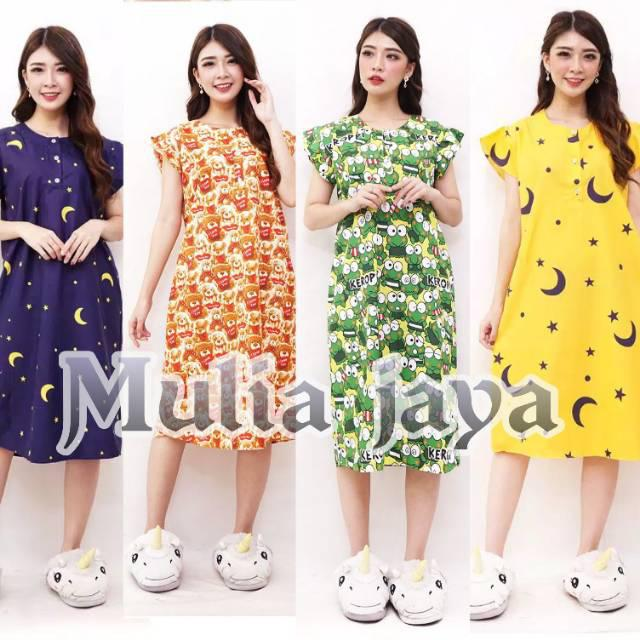

In [28]:
from IPython import display
display.Image("../00_source_data/shopee-product-matching/train_images/00117e4fc239b1b641ff08340b429633.jpg")


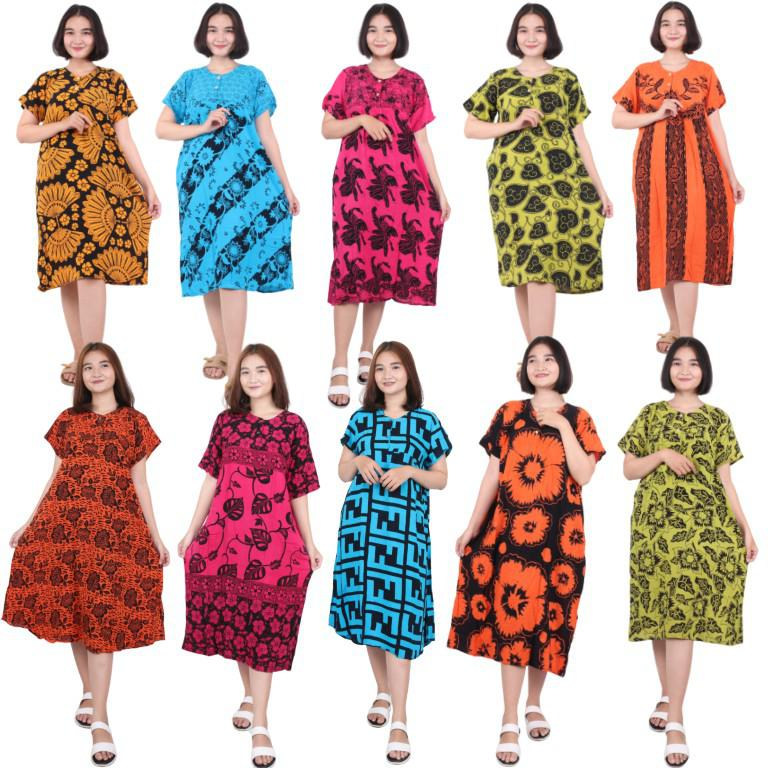

In [29]:
display.Image("../00_source_data/shopee-product-matching/train_images/d81acc9a273166cbfa8c85ca34d31f5f.jpg")

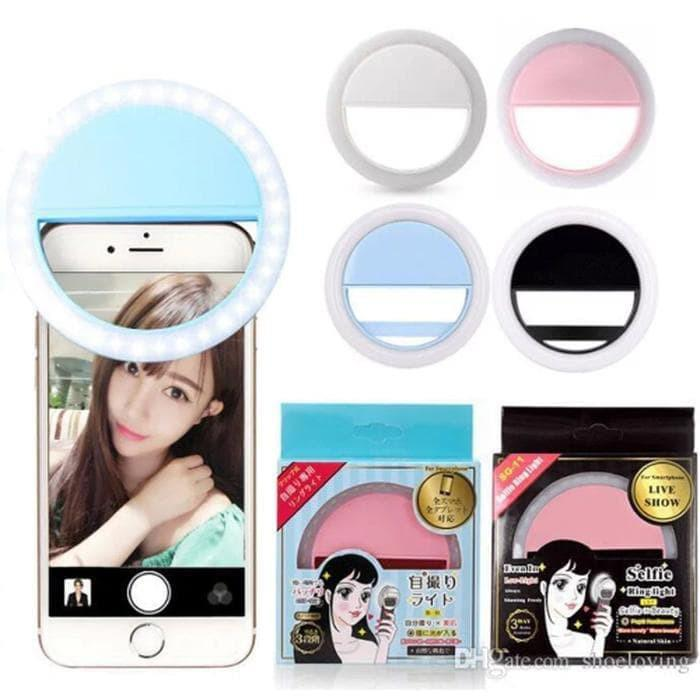

In [38]:
display.Image("../00_source_data/shopee-product-matching/train_images/f7488b93bcd633122524ebbca001dcba.jpg")